In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'/home/dirty_mike/Dropbox/github/image_quality_analysis/bin')
import tf_ms_ssim
import iqa_tools as iqa
import tensorflow as tf
from tensorflow.python.saved_model import tag_constants

## loading a saved model

In [47]:
data_path = '/home/dirty_mike/Dropbox/github/image_quality_analysis/data/sample_data/'
train_features, train_target, test_features, test_target = iqa.load_data(local=True, path=data_path, dataset='cxs')

In [48]:
variance = np.var(train_target)
train_features.shape

(500, 96, 96, 4)

In [49]:
# importing a saved model and running a prediction on it
graph = tf.Graph()
with graph.as_default():
    sess = tf.Session()
    tf.saved_model.loader.load(
        sess,
        [tag_constants.SERVING],
    '/home/dirty_mike/Dropbox/github/image_quality_analysis/bin2/ms_ssim_net/saved_models/cxs',
    )
    x = graph.get_tensor_by_name('x:0')
    y = graph.get_tensor_by_name('y:0')
    prediction = graph.get_tensor_by_name('prediction:0')
    prediction_ds1 = graph.get_tensor_by_name('prediction_ds1:0')
    prediction_ds2 = graph.get_tensor_by_name('prediction_ds2:0')
    cost = graph.get_tensor_by_name('cost:0')
    res = sess.run(prediction, feed_dict={
            x : train_features
            })
    res_cost = sess.run(cost, feed_dict={
            x: train_features,
            y : train_target
    })

INFO:tensorflow:Restoring parameters from /home/dirty_mike/Dropbox/github/image_quality_analysis/bin2/ms_ssim_net/saved_models/cxs/variables/variables


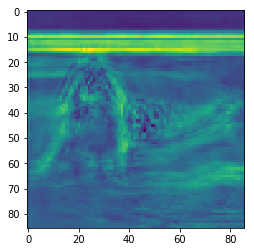

In [50]:
plt.imshow(res[0,:,:,0])
plt.show()

In [51]:
100*res_cost/variance

68.80463992168625

In [4]:
train_features, train_target, test_features, test_target = iqa.load_data(local=True, path=data_path, dataset='luminance')

In [5]:
train_features_swap = np.swapaxes(np.swapaxes(train_features, 1,3),2,3)
train_features_swap.shape

(500, 4, 96, 96)

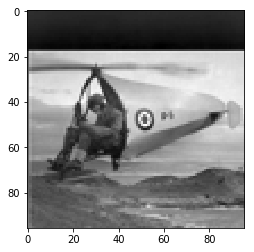

In [10]:
plt.imshow(train_features_swap[0,0,:,:], cmap='gray')
plt.show()

In [16]:
train_features_ds1 = []
for ii in range(500):
    for jj in range(4):
        train_features_ds1.append(iqa.down_sample_single(train_features_swap[ii,jj,:,:]))
train_features_ds1 = np.reshape(train_features_ds1, [500,4,48,48])
train_features_ds1 = np.swapaxes(np.swapaxes(train_features_ds1, 2,3),1,3)
train_features_ds1.shapet

(500, 48, 48, 4)

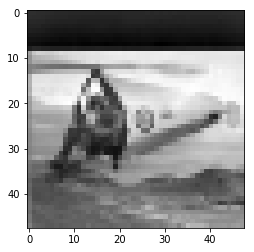

In [17]:
plt.imshow(train_features_ds1[0,:,:,0], cmap='gray')
plt.show()

In [29]:
variance = np.var(train_target)
train_features.shape

(500, 96, 96, 4)

In [43]:
# importing a saved model and running a prediction on it
graph = tf.Graph()
with graph.as_default():
    sess = tf.Session()
    tf.saved_model.loader.load(
        sess,
        [tag_constants.SERVING],
    '/home/dirty_mike/Dropbox/github/image_quality_analysis/bin2/ms_ssim_net/saved_models/lum',
    )
    x = graph.get_tensor_by_name('x:0')
    y = graph.get_tensor_by_name('y:0')
    x_ds1 = graph.get_tensor_by_name('x_ds1:0')
    y_ds1 = graph.get_tensor_by_name('y_ds1:0')
    prediction = graph.get_tensor_by_name('prediction:0')
    prediction_ds1 = graph.get_tensor_by_name('prediction_ds1:0')
    prediction_ds2 = graph.get_tensor_by_name('prediction_ds2:0')
    cost = graph.get_tensor_by_name('cost:0')
    res = sess.run(prediction, feed_dict={
            x : train_features
            })
    res_cost = sess.run(cost, feed_dict={
            x: train_features,
            y : train_target
    })
    res_ds1 = sess.run(prediction_ds1, feed_dict={
            x_ds1 : train_features_ds1
            })

INFO:tensorflow:Restoring parameters from /home/dirty_mike/Dropbox/github/image_quality_analysis/bin2/ms_ssim_net/saved_models/lum/variables/variables


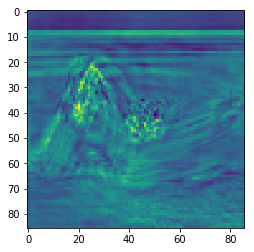

In [44]:
plt.imshow(res[0,:,:,0])
plt.show()

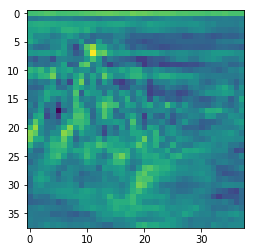

In [45]:
plt.imshow(res_ds1[0,:,:,0])
plt.show()

In [46]:
100*res_cost/variance

142.38126765233335